In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
df = pd.read_csv("dataset.csv")

# Cleaning the dataset

In [15]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

### Checking for any duplicate records

In [16]:
df = df.drop(columns=['id'])
df.duplicated().any()

False

### Converting the 'null' values in BMI to the median value

In [17]:
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']]).ravel()
df['smoking_status'] = df['smoking_status'].fillna(df['smoking_status'].mode()[0])

df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Converting the 'ever_married' column to int64 datatype where 1 represents 'yes' and 0 represents 'no'

In [18]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0}).astype('int64')
df['ever_married'].info()
df.head(10)

<class 'pandas.core.series.Series'>
RangeIndex: 43400 entries, 0 to 43399
Series name: ever_married
Non-Null Count  Dtype
--------------  -----
43400 non-null  int64
dtypes: int64(1)
memory usage: 339.2 KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,0,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,1,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,0,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,1,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,0,Never_worked,Rural,161.28,19.1,never smoked,0
5,Female,47.0,0,0,1,Private,Urban,210.95,50.1,never smoked,0
6,Female,52.0,0,0,1,Private,Urban,77.59,17.7,formerly smoked,0
7,Female,75.0,0,1,1,Self-employed,Rural,243.53,27.0,never smoked,0
8,Female,32.0,0,0,1,Private,Rural,77.67,32.3,smokes,0
9,Female,74.0,1,0,1,Self-employed,Urban,205.84,54.6,never smoked,0


In [19]:
df = pd.get_dummies(df, columns=['gender', 'work_type', 'smoking_status', 'Residence_type'], dtype=int)

# Summary Statistics

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             43400 non-null  float64
 1   hypertension                    43400 non-null  int64  
 2   heart_disease                   43400 non-null  int64  
 3   ever_married                    43400 non-null  int64  
 4   avg_glucose_level               43400 non-null  float64
 5   bmi                             43400 non-null  float64
 6   stroke                          43400 non-null  int64  
 7   gender_Female                   43400 non-null  int32  
 8   gender_Male                     43400 non-null  int32  
 9   gender_Other                    43400 non-null  int32  
 10  work_type_Govt_job              43400 non-null  int32  
 11  work_type_Never_worked          43400 non-null  int32  
 12  work_type_Private               

In [21]:
df.describe()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,0.643733,104.482750,28.574551,0.018041,0.591359,0.408387,0.000253,0.125346,0.004078,0.572212,0.156521,0.141843,0.172650,0.676152,0.151198,0.498710,0.501290
std,22.519649,0.291235,0.212733,0.478901,43.111751,7.639769,0.133103,0.491588,0.491541,0.015918,0.331114,0.063732,0.494764,0.363352,0.348893,0.377949,0.467948,0.358246,0.500004,0.500004
min,0.080000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,77.540000,23.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,1.000000,91.580000,27.700000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,60.000000,0.000000,0.000000,1.000000,112.070000,32.600000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,291.050000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
print([col for col in df.columns if col.startswith('gender')])
print(df['ever_married'].unique())
print([col for col in df.columns if col.startswith('work_type')])
print(df['Residence_type'].unique())
print([col for col in df.columns if col.startswith('smoking_status')])

['gender_Female', 'gender_Male', 'gender_Other']
[0 1]
['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']


KeyError: 'Residence_type'

In [ ]:
df.value_counts()

age    hypertension  heart_disease  ever_married  Residence_type  avg_glucose_level  bmi   stroke  gender_Female  gender_Male  gender_Other  work_type_Govt_job  work_type_Never_worked  work_type_Private  work_type_Self-employed  work_type_children  smoking_status_formerly smoked  smoking_status_never smoked  smoking_status_smokes
0.08   0             0              0             Rural           70.33              16.9  0       0              1            0             0                   0                       0                  0                        1                   0                               1                            0                        1
54.00  1             0              1             Rural           75.92              28.8  0       1              0            0             1                   0                       0                  0                        0                   0                               1                            0                    

## Summary Statistics - avg_glucose_level

In [ ]:
avg_glucose_level = df["avg_glucose_level"]
df_no_outliers = df.copy()
df_outliers = df.copy()

Q1 = avg_glucose_level.quantile(0.25)
Q3 = avg_glucose_level.quantile(0.75)
IQR = Q3-Q1
Q1,Q3,IQR

(77.54, 112.07, 34.52999999999999)

In [ ]:
lower_glucose_level = Q1 - 1.5*IQR
upper_glucose_level = Q3 + 1.5*IQR
lower_glucose_level, upper_glucose_level

(25.745000000000026, 163.86499999999998)

In [ ]:
df_outliers = df[(avg_glucose_level < lower_glucose_level) | (avg_glucose_level > upper_glucose_level)]

df_no_outliers = df[(avg_glucose_level >= lower_glucose_level) & (avg_glucose_level <= upper_glucose_level)]

print(f"Outliers Detected: {len(df_outliers)}")

Outliers Detected: 4978


In [ ]:
print(df_no_outliers)

        age  hypertension  heart_disease  ever_married Residence_type  \
0       3.0             0              0             0          Rural   
1      58.0             1              0             1          Urban   
2       8.0             0              0             0          Urban   
3      70.0             0              0             1          Rural   
4      14.0             0              0             0          Rural   
...     ...           ...            ...           ...            ...   
43394  47.0             0              0             0          Urban   
43395  10.0             0              0             0          Urban   
43397  82.0             1              0             1          Urban   
43398  40.0             0              0             1          Urban   
43399  82.0             0              0             1          Urban   

       avg_glucose_level   bmi  stroke  gender_Female  gender_Male  \
0                  95.12  18.0       0              0

## Summary Statistics - bmi

In [ ]:
df = df_no_outliers
bmi = df['bmi']

Q1 = bmi.quantile(0.25)
Q3 = bmi.quantile(0.75)
IQR = Q3-Q1
Q1,Q3,IQR

(23.0, 32.0, 9.0)

In [ ]:
lower_bmi = Q1 - 1.5*IQR
upper_bmi = Q3 + 1.5*IQR
lower_bmi, upper_bmi

(9.5, 45.5)

In [ ]:
df_outliers = df[(bmi < lower_bmi) | (bmi > upper_bmi)]

df_no_outliers = df[(bmi >= lower_bmi) & (bmi <= upper_bmi)]

print(f"Outliers Detected: {len(df_outliers)}")

Outliers Detected: 909


In [ ]:
print(df_no_outliers)

        age  hypertension  heart_disease  ever_married Residence_type  \
0       3.0             0              0             0          Rural   
1      58.0             1              0             1          Urban   
2       8.0             0              0             0          Urban   
3      70.0             0              0             1          Rural   
4      14.0             0              0             0          Rural   
...     ...           ...            ...           ...            ...   
43394  47.0             0              0             0          Urban   
43395  10.0             0              0             0          Urban   
43397  82.0             1              0             1          Urban   
43398  40.0             0              0             1          Urban   
43399  82.0             0              0             1          Urban   

       avg_glucose_level   bmi  stroke  gender_Female  gender_Male  \
0                  95.12  18.0       0              0

# Data Preprocessing

### Standardizing categorical values

In [ ]:
df['smoking_status'] = df['smoking_status'].replace({'formerly_smoked': 'formerly smoked'})
df['work_type'] = df['work_type'].replace({'govt job': 'Govt_job'})
df['gender'] = df['gender'].replace({'female': 'Female', 'm': 'Male'})

print(df['smoking_status'].unique())
print(df['work_type'].unique())
print(df['gender'].unique())

KeyError: 'smoking_status'

### Encoding categorical values

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False)

encoded_data = pd.DataFrame(
    encoder.fit_transform(df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

print(encoded_data.head())

   gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
0            0.0          1.0           0.0                 0.0   
1            0.0          1.0           0.0                 0.0   
2            1.0          0.0           0.0                 0.0   
3            1.0          0.0           0.0                 0.0   
4            0.0          1.0           0.0                 0.0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                     0.0                0.0                      0.0   
1                     0.0                1.0                      0.0   
2                     0.0                1.0                      0.0   
3                     0.0                1.0                      0.0   
4                     1.0                0.0                      0.0   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                 1.0                   1.0                   0.0   
1                 0.

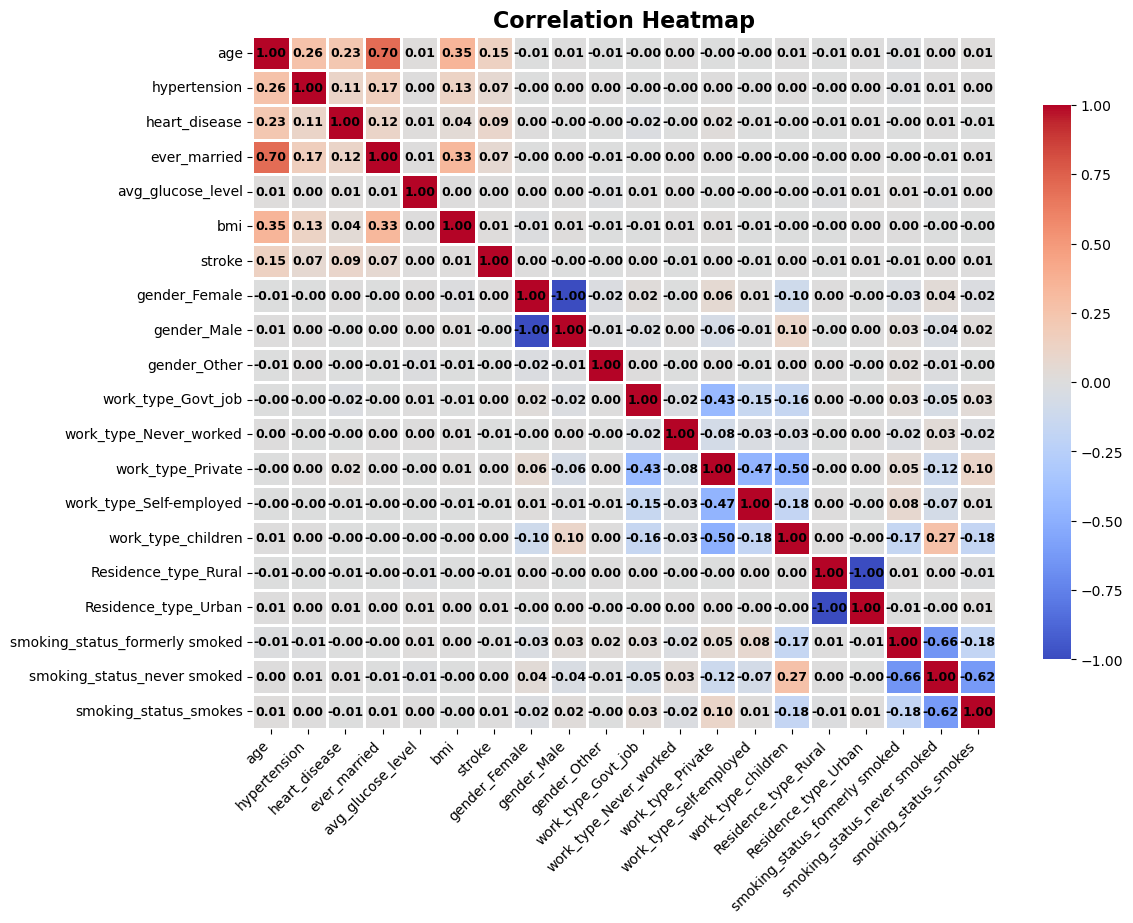

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
encoded_df = pd.concat([df[numerical_cols], encoded_data], axis=1)
 
correlation_matrix = encoded_df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            cbar_kws={'shrink': 0.8}, linewidths=1, linecolor='white',
            annot_kws={'size': 9, 'weight': 'bold', 'color': 'black'})

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.show()

### Feature Scaling

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['stroke']).columns
scaler = MinMaxScaler()

scaled_data = pd.DataFrame(
    scaler.fit_transform(df[numerical_cols]),
    columns=numerical_cols
)

print(scaled_data.head())

        age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0  0.035645           0.0            0.0           0.0           0.368614   
1  0.707031           1.0            0.0           1.0           0.302830   
2  0.096680           0.0            0.0           0.0           0.513506   
3  0.853516           0.0            0.0           1.0           0.128997   
4  0.169922           0.0            0.0           0.0           0.976479   

        bmi  
0  0.090286  
1  0.332571  
2  0.085714  
3  0.294857  
4  0.102857  


In [ ]:
processed_data = pd.concat([scaled_data, encoded_data], axis=1)
print(processed_data.head())

        age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0  0.035645           0.0            0.0           0.0           0.368614   
1  0.707031           1.0            0.0           1.0           0.302830   
2  0.096680           0.0            0.0           0.0           0.513506   
3  0.853516           0.0            0.0           1.0           0.128997   
4  0.169922           0.0            0.0           0.0           0.976479   

        bmi  gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
0  0.090286            0.0          1.0           0.0                 0.0   
1  0.332571            0.0          1.0           0.0                 0.0   
2  0.085714            1.0          0.0           0.0                 0.0   
3  0.294857            1.0          0.0           0.0                 0.0   
4  0.102857            0.0          1.0           0.0                 0.0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0

### Applying 95% PCA

In [ ]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(processed_data)

print(f"Original number of features: {processed_data.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

Original number of features: 19
Reduced number of features after PCA: 9


In [ ]:
components_df = pd.DataFrame(pca.components_, columns=processed_data.columns)

top_features_per_pc = components_df.abs().idxmax(axis=1)

print("Most important original features for each principal component:")
print(top_features_per_pc.unique())

Most important original features for each principal component:
['Residence_type_Rural' 'gender_Female' 'smoking_status_never smoked'
 'work_type_Private' 'smoking_status_smokes' 'work_type_Govt_job'
 'work_type_children' 'hypertension']


In [ ]:
print("Feature Importance Count:")
print(top_features_per_pc.value_counts())

Feature Importance Count:
smoking_status_never smoked    2
Residence_type_Rural           1
gender_Female                  1
work_type_Private              1
smoking_status_smokes          1
work_type_Govt_job             1
work_type_children             1
hypertension                   1
Name: count, dtype: int64


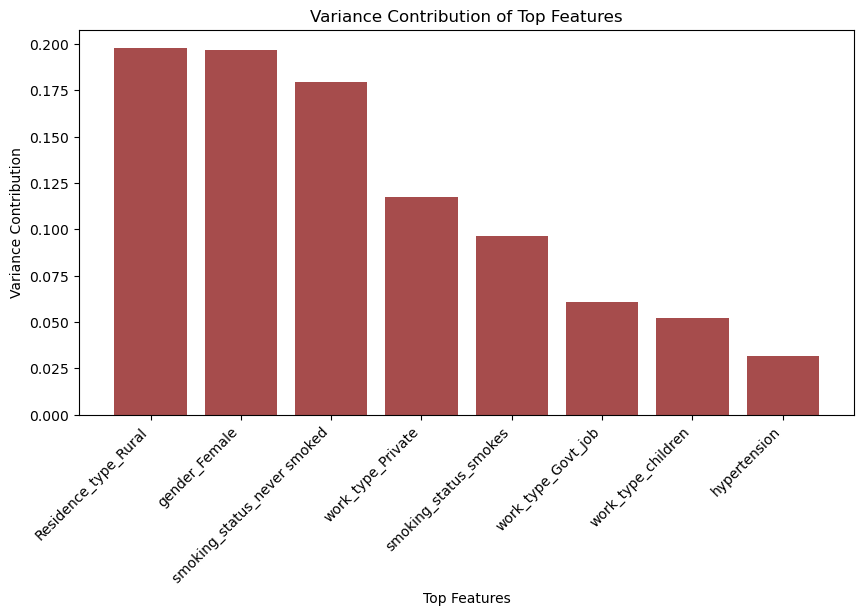

In [ ]:
top_features = top_features_per_pc.unique()
top_feature_variances = [pca.explained_variance_ratio_[i] for i in range(len(top_features))]


plt.figure(figsize=(10, 5))
plt.bar(top_features, top_feature_variances, alpha=0.7, align='center', color='maroon')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Top Features')
plt.ylabel('Variance Contribution')
plt.title('Variance Contribution of Top Features')
plt.show()

### Saving the cleaned dataset to a csv file

In [ ]:
df.to_csv("Cleaned-stroke-data.csv", index=False)

# Basic Data Visualization

### Histogram of Average Glucose Level

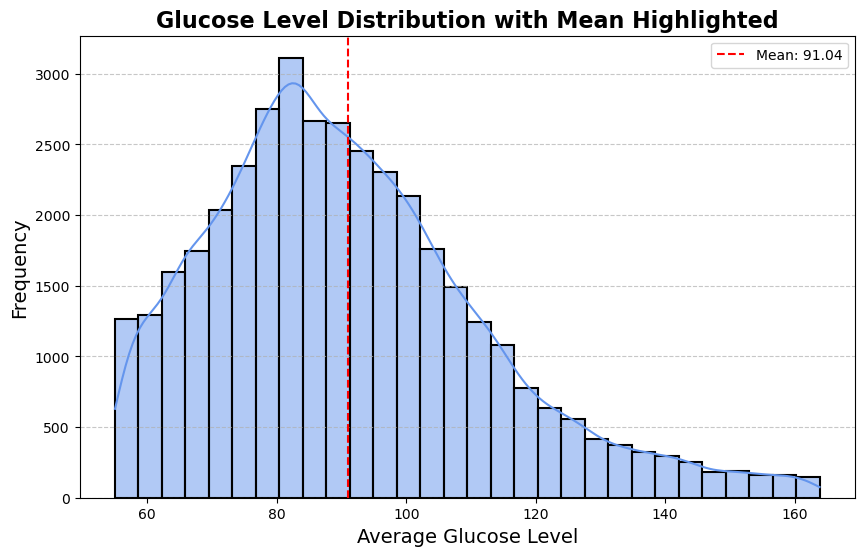

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df['avg_glucose_level'], kde=True, color='cornflowerblue', bins=30, linewidth=1.5)

mean_glucose = df['avg_glucose_level'].mean()

plt.axvline(mean_glucose, color='red', linestyle='--', label=f'Mean: {mean_glucose:.2f}')
plt.title("Glucose Level Distribution with Mean Highlighted", fontsize=16, fontweight='bold')
plt.xlabel("Average Glucose Level", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### Box and Whisker Plot of BMI vs Stroke

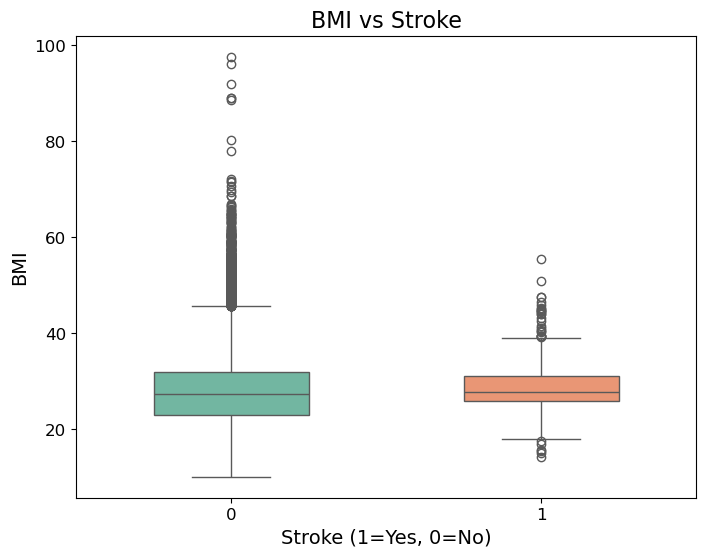

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, x='stroke', y='bmi', hue='stroke', palette='Set2', width=0.5, legend=False)

plt.title("BMI vs Stroke", fontsize=16)
plt.xlabel("Stroke (1=Yes, 0=No)", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Correlation Heatmap

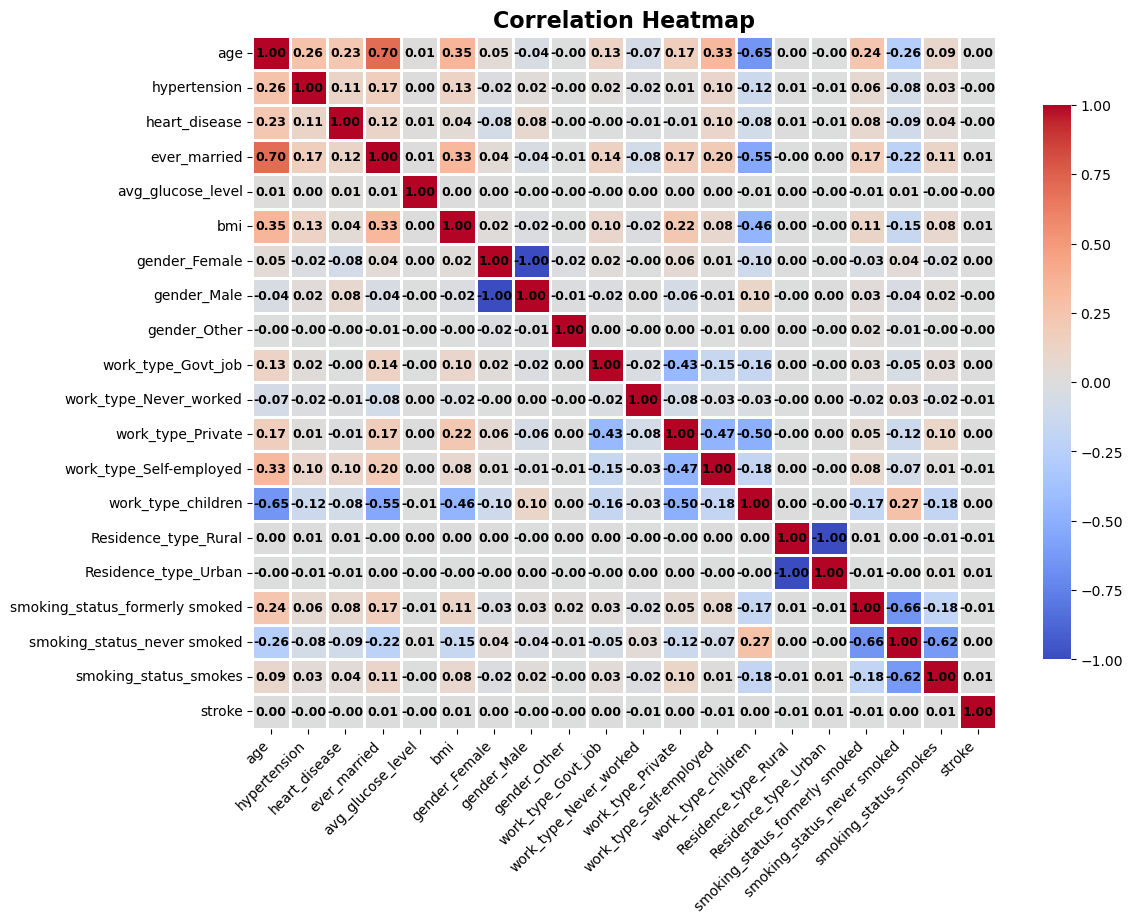

In [ ]:
processed_data['stroke'] = df['stroke']  
correlation_matrix = processed_data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            cbar_kws={'shrink': 0.8}, linewidths=1, linecolor='white',
            annot_kws={'size': 9, 'weight': 'bold', 'color': 'black'})

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.show()

### Kernel Density Estimate of Age by Stroke Status

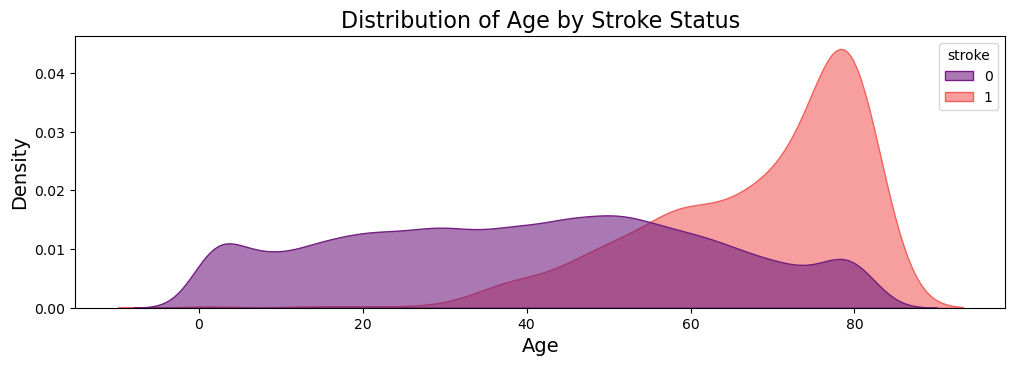

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, common_norm=False, alpha=0.6, palette='magma')
plt.title("Distribution of Age by Stroke Status", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

### Kernel Density Estimate of BMI by Stroke Status

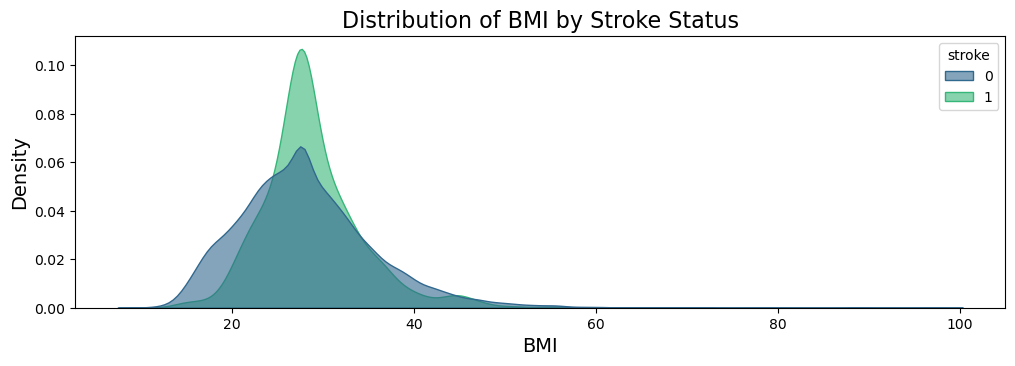

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 2)
sns.kdeplot(data=df, x='bmi', hue='stroke', fill=True, common_norm=False, alpha=0.6, palette='viridis')
plt.title("Distribution of BMI by Stroke Status", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

### Kernel Density Estimate of Average Glucose Level by Stroke Status

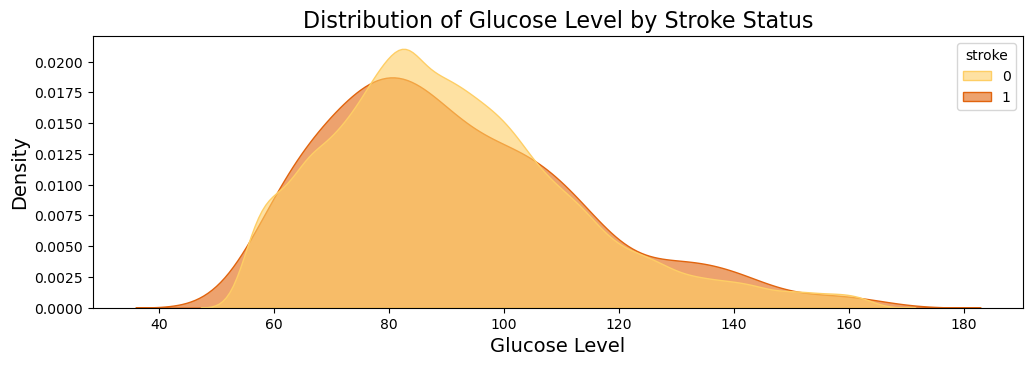

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 3)
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True, common_norm=False, alpha=0.6, palette='YlOrBr')
plt.title("Distribution of Glucose Level by Stroke Status", fontsize=16)
plt.xlabel("Glucose Level", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

### Countplot of Ever Married

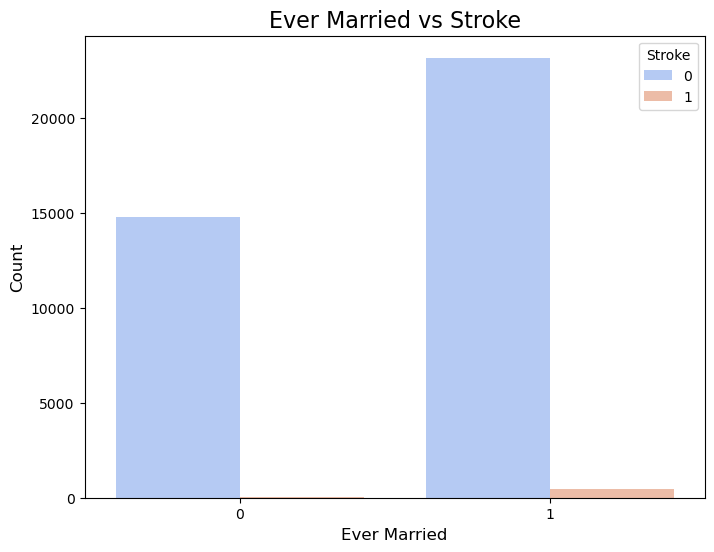

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ever_married', hue='stroke', data=df, palette='coolwarm')

plt.title('Ever Married vs Stroke', fontsize=16)
plt.xlabel('Ever Married', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Stroke', loc='upper right')
plt.show()

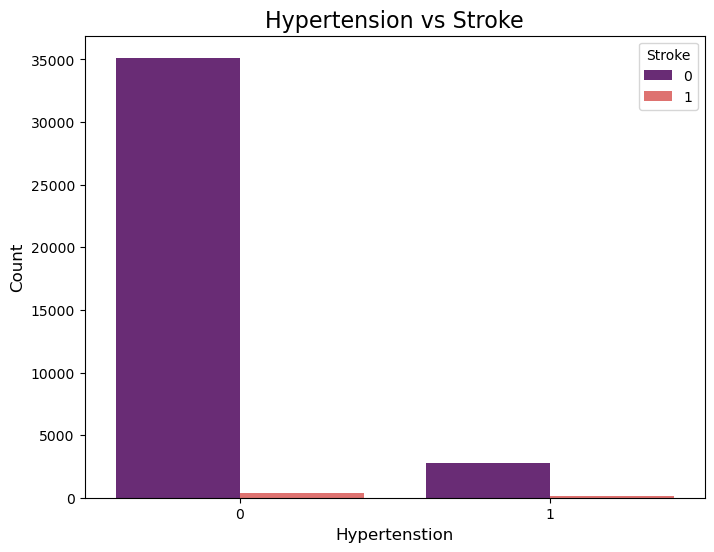

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', hue='stroke', data=df, palette='magma')

plt.title('Hypertension vs Stroke', fontsize=16)
plt.xlabel('Hypertenstion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Stroke', loc='upper right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)  
y = df['stroke']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 34720 samples
Test set size: 8680 samples


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_resampled.value_counts())

Before SMOTE:
 stroke
0    34098
1      622
Name: count, dtype: int64
After SMOTE:
 stroke
0    34098
1    34098
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.04      0.01      0.01       161

    accuracy                           0.98      8680
   macro avg       0.51      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



e:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train_resampled)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.10      0.02      0.03       161

    accuracy                           0.98      8680
   macro avg       0.54      0.51      0.51      8680
weighted avg       0.97      0.98      0.97      8680



In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.12      0.02      0.03       161

    accuracy                           0.98      8680
   macro avg       0.55      0.51      0.51      8680
weighted avg       0.97      0.98      0.97      8680



In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

e:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:37:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.08      0.02      0.03       161

    accuracy                           0.98      8680
   macro avg       0.53      0.51      0.51      8680
weighted avg       0.96      0.98      0.97      8680



In [ ]:
from sklearn.metrics import classification_report


y_probs = model.predict_proba(X_test_scaled)[:, 1]

y_pred_adjusted = (y_probs >= 0.3).astype(int)

print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      8519
           1       0.07      0.18      0.10       161

    accuracy                           0.94      8680
   macro avg       0.53      0.57      0.53      8680
weighted avg       0.97      0.94      0.95      8680



In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Select top 10 features based on chi² test
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X_train_resampled, y_train_resampled)

mask = selector.get_support()
selected_features = X_train.columns[mask]
print("Top 10 selected features:\n", selected_features)

Top 10 selected features:
 Index(['age', 'avg_glucose_level', 'gender_Female', 'gender_Male',
       'work_type_Govt_job', 'work_type_children',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'Residence_type_Rural', 'Residence_type_Urban'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train_resampled, y_train_resampled)

selected_features = X_train.columns[rfe.support_]
print("Top 10 features from RFE:\n", selected_features)

e:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Top 10 features from RFE:
 Index(['gender_Female', 'gender_Male', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Rural',
       'Residence_type_Urban'],
      dtype='object')


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print("Top features based on Random Forest:\n", feature_importance.head(10))

Top features based on Random Forest:
 age                               0.283280
avg_glucose_level                 0.082109
smoking_status_never smoked       0.073028
Residence_type_Urban              0.070617
gender_Male                       0.062755
bmi                               0.055468
Residence_type_Rural              0.054600
smoking_status_formerly smoked    0.054012
gender_Female                     0.052209
smoking_status_smokes             0.051505
dtype: float64


# Retraining models using top features

In [ ]:
top_features = [
    'age',
    'avg_glucose_level',
    'bmi',
    'gender_Female',
    'gender_Male',
    'Residence_type_Rural',
    'Residence_type_Urban',
    'smoking_status_formerly smoked',
    'smoking_status_never smoked',
    'smoking_status_smokes'
]

X_top = X[top_features]  

In [42]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_top, y_train)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_top)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_train_scaled, y_train_resampled)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8519
           1       0.09      0.15      0.12       161

    accuracy                           0.96      8680
   macro avg       0.54      0.56      0.55      8680
weighted avg       0.97      0.96      0.96      8680



In [ ]:

# 1. Logistic Regression

lr = LogisticRegression(max_iter=2000, class_weight='balanced')
lr.fit(X_train_scaled, y_train_resampled)
y_pred_lr = lr.predict(X_test_scaled)
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))


# 2. Random Forest

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_top)
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))


# 3. XGBoost

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test_top)
print("=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8519
           1       0.09      0.15      0.12       161

    accuracy                           0.96      8680
   macro avg       0.54      0.56      0.55      8680
weighted avg       0.97      0.96      0.96      8680

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.05      0.01      0.02       161

    accuracy                           0.98      8680
   macro avg       0.52      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.05      0.01      0.02       161

    accuracy                           0.98      8680
   macro avg       0.52      0.50      0.50      8680
weighted

e:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:44:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


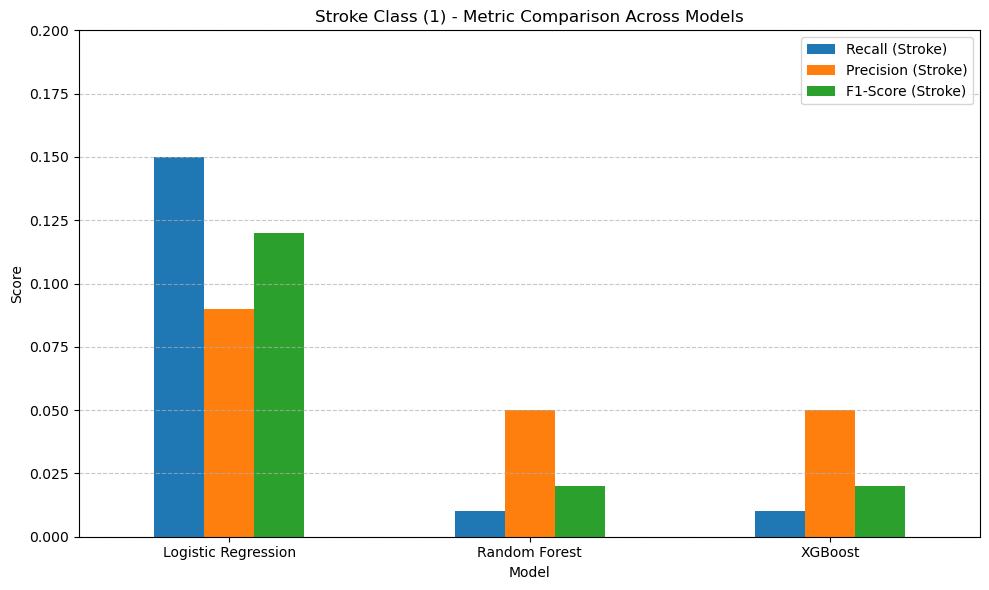

In [ ]:

model_names = ["Logistic Regression", "Random Forest", "XGBoost"]
recall_stroke = [0.15, 0.01, 0.01]
precision_stroke = [0.09, 0.05, 0.05]
f1_stroke = [0.12, 0.02, 0.02]

df_metrics = pd.DataFrame({
    'Model': model_names,
    'Recall (Stroke)': recall_stroke,
    'Precision (Stroke)': precision_stroke,
    'F1-Score (Stroke)': f1_stroke
})


ax = df_metrics.set_index("Model").plot(kind='bar', figsize=(10, 6))
plt.title("Stroke Class (1) - Metric Comparison Across Models")
plt.ylabel("Score")
plt.ylim(0, 0.2)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

# Reuse trained models
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced')
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Ensemble model using soft voting
ensemble = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='soft'
)

# Train on SMOTE-resampled data
ensemble.fit(X_train_scaled, y_train_resampled)

# Predict on scaled test data
y_pred_ensemble = ensemble.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import classification_report
print("=== Ensemble Model (Soft Voting) ===")
print(classification_report(y_test, y_pred_ensemble))

e:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:46:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Ensemble Model (Soft Voting) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.06      0.01      0.01       161

    accuracy                           0.98      8680
   macro avg       0.52      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680

